# Introduction to Machine Learning

<b>Joraaver Chahal
<br>October 12 2015</b>


## What is Machine Learning?

Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed. Machine learning focuses on the development of computer programs that can teach themselves to grow and change when exposed to new data. 

-WhatIs.com

<b>In the simplest terms, it's using the data provided to see if a machine can "learn" what kind of relationships exist within the data.</b>

## Examples of Machine Learning

Spam filter: based on the details of the incoming email (from, subject, body) should the email be delivered to 
    the inbox or classified as spam?

Facial Detection: given a database of faces, is a picture of a face already inside the database, or is it a new face?

* Not just matching faces. Depends on angle, lighting, facial hair, etc.

Sound source separation: given an audio stream, is it possible to separate different sound sources? 

Species analysis: given lots of samples of lengths of different bones , do the bones belong to different species, or are they all of the same species?

Many more!

## The Setup

### Current environment:

Python: 2.7.10 or 3.3.5  

IPython: 4.0.0 or 3.2.0

scikit-learn: 0.16.1

latest version of numpy and matplotlib

scikit-learn installation: [http://scikit-learn.org/stable/install.html](http://scikit-learn.org/stable/install.html)

# Diving in

## Types of Machine Learning

#### Supervised Learning

* Building a spam filter when given previous emails that are labeled spam/email

#### Unsupervised Learning

* Distinguishing different species given lots of samples of lengths of different bones, without prior 
knowledge of different species' bone lengths.

## What separates the two kinds of learning?

<span style ="font-size: 1.2em">Supervised learning can be done when the <b>data provided already has labels</b> attached to each sample.</span> <br>


* In the spam filter example, each sample is an email that arrives at the server, and the label is whether it is spam, or is not spam. To express that as an integer requires simple binary mapping: 1 is spam, 0 is not spam

<span style ="font-size: 1.2em">Used for <b>predicting</b> the label of a new sample or data point</span>

<span style ="font-size: 1.2em">Unsupervised learning is done when the <b>data is completely unlabeled</b></span>


* In the species analysis example, all the samples come with no species attached. 
* The question then isn't what species is each sample, but does the sample define a distinct species, or is it too similiar to other samples?

<span style ="font-size: 1.2em">Used for <b>finding</b> some kind of grouping for the samples, and then <b>predicting</b> a new sample </span>

# Supervised Learning

Two types: <b>Classification</b> and <b>Regression</b>

Before we begin, please fire up the ipython console:

In [ ]:
ipython qtconsole

## Classification

Load up the iris dataset!

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


iris is now a dictionary of key value terms. What are its <b>labels</b>?

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


What are its <b>features</b>?

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


How many samples are we working with?

In [8]:
print(iris.data.shape)

(150, 4)


### Classifying a New Sample

First, let's look at the data space:

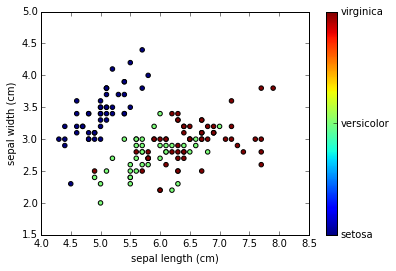

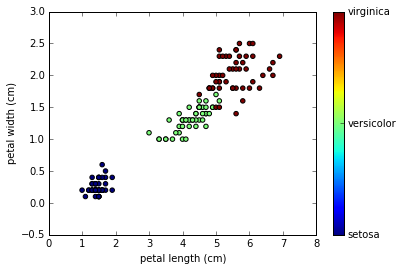

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = iris.target

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(1)
plt.scatter(iris.data[:,0], iris.data[:,1],c=y)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.figure(2)
plt.scatter(iris.data[:,2], iris.data[:,3],c=y)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

Suppose this is the new sample:

In [7]:
unknown = [7.5,3,6,2.5]

We are now going to take <b>choose a model</b>, <b>fit it</b> to the data, and <b>predict the label</b> of this unknown sample.

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(iris.data,iris.target)

print(iris.target_names[model.predict(unknown)])

['virginica']


In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(iris.data,iris.target)
print(iris.target_names[model.predict(unknown)])


['virginica']


But suppose the unknown class is now this:

In [10]:
unknown = [7.5,3,4,2.5]

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(iris.data,iris.target)
print(iris.target_names[model.predict(unknown)])
print(model.score(iris.data,iris.target))


['virginica']
1.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(iris.data,iris.target)
print(iris.target_names[model.predict(unknown)])
print(model.score(iris.data,iris.target))


['versicolor']
0.966666666667


What does this tell us? <b> Don't blindly apply algorithms! </b>

### Linear Regression works along the same principles!

The only difference is that the target label is a <b>continuous</b> variable

* Dataset is just a pair of x and y values (simplest example).
* Given a new x, what would be the predicted y?

Let's give it a whirl, just for kicks.

But this time, I'll give the skeleton, <b>you</b> can provide the code.

Don't worry, I'll give you the answer in a little while.

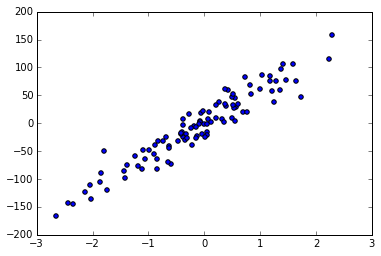

In [16]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y = make_regression(n_samples=100,n_features=1,noise=20,random_state=2)

plt.figure(1)
plt.scatter(X,y)

In [17]:
#Make a new linear regression model

#Fit it to the data provided.

#Predict a new value
unknown = 2

In [25]:
model = LinearRegression()

model.fit(X,y)

print(model.predict(unknown))

print(model.coef_)
print(model.score(X,y))

[ 116.77075923]
[ 58.11865999]
0.912323052787


## Key Points in Supervised Learning

Just remember, with supervised learning, the steps are:

1. Pick a model

2. Fit the model

3. Score the model (to check how well it does)

3. Predict the new sample.

<b>Good Practice</b>: Check the chosen model by splitting the provided dataset into a <b>train</b> and a <b>test</b> dataset
    
1. Use the train dataset to fit your model. Improve and iterate on this dataset.
2. Once satisfied with the model, use the test dataset to check how well your model performs.


scikit-learn has a convenience method for this:

    train_test_split(X,y)
    
X is the set of samples, y is the set of labels. Returns 4 arrays: train data, test data, train labels, and test labels.

This will mitigate the effects of <b>overfitting</b>! 

In [13]:
from sklearn.cross_validation import train_test_split

unknown = [7.5,3,4,2.5]

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target)

model = KNeighborsClassifier()

#This is the different part! First, we train on the training data
model.fit(X_train,y_train)

#Now, we check our score on the training set
print(model.score(X_train,y_train))

#Then, we look at the score when the model is applied to the testing data
print(model.score(X_test, y_test))

print(iris.target_names[model.predict(unknown)])


0.964285714286
0.973684210526
['versicolor']


# Try this!

In [28]:

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=4, n_features=3,random_state=0)


Use the <b>KNearestNeighbors</b> classifier to predict the unknown point sample [0,10,10]. But make sure to split the data into training and testing datasets to provide a more realistic fitting of the data. Try and iterate on the number of neighbors you use to optimize the score for the model on just the training set. One you do that, only then should you try to see your score on the test set. Then predict your model. Do NOT iterate your neighbor count after seeing the score on the test set!

In [55]:
#print help(KNeighborsClassifier)
#print help(train_test_split)

In [70]:
unknown = [0,10,10]

X_train, X_test, y_train, y_test = train_test_split(X,y)

model= KNeighborsClassifier(n_neighbors=20)

model.fit(X_train,y_train)
print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

print(model.predict(unknown))


0.986666666667
0.96
[2]


# Closing Remarks

### Thanks for attending the first machine learning workshop of the quarter

Next workshop will be during <b>5th week</b>!

Resources:
    
   * Coursera's Machine Learning course: [https://www.coursera.org/course/ml](https://www.coursera.org/course/ml)
   * Yahoo Lab's recent Machine Learning tutorials: [http://yahoolabs.tumblr.com/post/97839313996/machine-learning-for-smart-dummies](http://yahoolabs.tumblr.com/post/97839313996/machine-learning-for-smart-dummies)
   * UCLA's Data Mining course CS 145: watch out, this class is pretty dry, but you learn A LOT about the algorithms.
   * PyCon 2015: [https://www.youtube.com/channel/UCgxzjK6GuOHVKR_08TT4hJQ/search?query=machine+learning](https://www.youtube.com/channel/UCgxzjK6GuOHVKR_08TT4hJQ/search?query=machine+learning) (pre-searched machine learning)
   * Datatau: [http://www.datatau.com/](http://www.datatau.com/). It's the Hacker News for all things data!
